# Загрузка данных

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

Этот набор данных содержит более миллиона транзакций, совершённых более чем 800 тысячами клиентов банка в Индии. Данные содержат ​​информацию:
* `TransactionID` - идентификатор транзакции,
* `CustomerID` - идентификатор пользователя,
* `CustomerDOB` - дата рождения,
* `CustGender` - пол,
* `CustLocation` - местоположение (город),
* `CustAccountBalance` - баланс счёта на момент транзакции, в индийских рупиях,
* `TransactionDate` - дата транзакции,
* `TransactionTime` - время транзакции,
* `TransactionAmount (INR)` - сумма транзакции, в индийских рупиях.

In [ ]:
# Импортируем библиотеки
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
# Загружаем данные в датафрейм
df = pd.read_csv('/content/drive/MyDrive/zerocod/z_14/bank/bank_clients_transactions.csv')

In [ ]:
# Смотрим основную информацию по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
# Выводим первые строки датафрейма
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


**Вывод:**

* В датафрейме 9 колонок и 1,048,567 строк.
* Названия колонок не соответствует рекомендуемому стилю.
* Колонки с датой и временем `CustomerDOB`, `TransactionDate`, `TransactionTime` имеют несоответствующий тип данных, остальные колонки соответствуют своим значениям и присвоенным им типам данных.
* В колонках `CustomerDOB`, `CustGender`, `CustLocation`, `CustAccountBalance` есть пропуски.

# Приведение столбцов к стилю snake_case

In [ ]:
# Составим функцию для переименования столбцов
def to_snake_case(column_name):
    column_name = re.sub(r'[\(\)]', '', column_name)  # Удаляем скобки
    column_name = re.sub(r'([a-z])([A-Z])', r'\1_\2', column_name)  # CamelCase to snake_case
    return column_name.lower().replace(' ', '_')

# Применяем ко всем колонкам
df.columns = [to_snake_case(col) for col in df.columns]

In [ ]:
# Проверяем результат
df.columns

Index(['transaction_id', 'customer_id', 'customer_dob', 'cust_gender',
       'cust_location', 'cust_account_balance', 'transaction_date',
       'transaction_time', 'transaction_amount_inr'],
      dtype='object')

# Приведение типов данных

**Колонка `transaction_date`**

Начнем с колонки `transaction_date`, которая содержит дату транзакции. После первого знакомства с данными можно сделать вывод, что колонки с датами в формате "день/месяц/год".

In [ ]:
# Приводим дату к типу datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%y', errors='coerce')

# Проверим диапазон дат
print(df['transaction_date'].min(), '-', df['transaction_date'].max())

2016-08-01 00:00:00 - 2016-10-21 00:00:00


Даты транзакций за 2016 год с 1 августа по 21 октября. Получается данные за октябрь собраны не полностью.

Далее изучим колонку `transaction_time`, где должно быть время транзакции.

**Колонка `transaction_time`**

In [ ]:
# Проверим диапазон значений
print(df['transaction_time'].min(), '-', df['transaction_time'].max())

0 - 235959


In [ ]:
# Посмотрим еще на несколько значений
df[(df['transaction_time'] == 59) |
   (df['transaction_time'] == 5959) |
   (df['transaction_time'] == 5900) |
   (df['transaction_time'] == 61)
  ]['transaction_time']

,transaction_time
199298,5959
278281,59
313673,5959
417331,5900
419014,5900
594203,5959
623064,59
725863,59
791461,59
970722,59


Похоже, что данные в колонке представленны в формате "hhmmss". Если две или 4 цифры, то формат "ss" и "mmss" соответственно.

In [ ]:
# Преобразуем в строку и добавим нули в начало, чтобы каждое значение было из 6 цифр
df['transaction_time'] = df['transaction_time'].astype(str).str.zfill(6)

# Переводим значения во временной тип данных и оставляем только время
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H%M%S').dt.time

**Колонка `customer_dob`**

Изучим колонку `customer_dob`, которая содержит дату рождения.

In [ ]:
# Посмотрим первых 20 уникальных значений
df['customer_dob'].unique()[:20]

array(['10/1/94', '4/4/57', '26/11/96', '14/9/73', '24/3/88', '8/10/72',
       '26/1/92', '27/1/82', '19/4/88', '22/6/84', '22/7/82', '7/7/88',
       '13/6/78', '5/1/92', '24/3/78', '10/7/68', '1/1/1800', '16/7/89',
       '11/1/91', '24/6/85'], dtype=object)

Есть значение - '1/1/1800', похожее на ошибку. Это не похоже на дату рождения и оно выбивается из общего формата.

In [ ]:
# Посмотрим количество таких значений
df[df['customer_dob'] == '1/1/1800']['customer_dob'].count()

np.int64(57339)

57 тыс. повторений - это явно техническая ошибка. При смене типа данных заменим это значение на 'NaT'.

In [ ]:
# Приводим дату к типу datetime и возникающие ошибки преобразуем в 'NaT'
df['customer_dob'] = pd.to_datetime(df['customer_dob'], format='%d/%m/%y', errors='coerce')

# Проверим диапазон дат
print(df['customer_dob'].min(), '-', df['customer_dob'].max())

1969-01-01 00:00:00 - 2068-12-31 00:00:00


 Верхняя граница получилась завышенной, так как используемая функция может относить ранние года к 21 веку. Дата транзакций в наших данных - 2016 год, а в Индии управлять самостоятельно счетом в банке могут начиная с [10 лет](https://www.ujjivansfb.in/banking-blogs/savings-account/rbi-new-rules-for-savings-accounts-for-kids), поэтому оставим 2006 год, а остальные переведем в 1900+.

In [ ]:
# Для дат после 2006 года исправляем на 1900+ (если год больше, значит это прошлый век)
mask = df['customer_dob'].dt.year > 2006
df.loc[mask, 'customer_dob'] = df.loc[mask, 'customer_dob'] - pd.DateOffset(years=100)

# Проверим диапазон дат
print(df['customer_dob'].min(), '-', df['customer_dob'].max())

1907-01-02 00:00:00 - 2006-11-08 00:00:00


In [ ]:
# Проверим результат
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transaction_id          1048567 non-null  object        
 1   customer_id             1048567 non-null  object        
 2   customer_dob            987831 non-null   datetime64[ns]
 3   cust_gender             1047467 non-null  object        
 4   cust_location           1048416 non-null  object        
 5   cust_account_balance    1046198 non-null  float64       
 6   transaction_date        1048567 non-null  datetime64[ns]
 7   transaction_time        1048567 non-null  object        
 8   transaction_amount_inr  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 72.0+ MB


,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.5


**Вывод:**

* Колонки `customer_dob`, `transaction_date` теперь содержат значения нужного типа данных. Но в `customer_dob` остались странные даты, некоторым пользователям во время транзакции было более 100 лет, но и дети меньше 10 лет также не могли делать переводы. Возможно придется очистить такие данные.
* В колонке `customer_dob` из-за технической ошибки стало больше пропусков.
* Колонка `transaction_time` теперь содержит значения формата 'datetime.time', показывающие время транзакции.

# Поиск дублей и пропусков в данных

**Работа с пропусками**

In [ ]:
# Посмотрим количество пропусков по колонкам
df.isna().sum()

,0
transaction_id,0
customer_id,0
customer_dob,60736
cust_gender,1100
cust_location,151
cust_account_balance,2369
transaction_date,0
transaction_time,0
transaction_amount_inr,0


Больше всего пропусков в колонке с датой рождения: 60,736. В остальных колонках незначительное количество пропусков, учитывая, что в данных более миллиона строк. Можно попытаться их востановить. Если у одного пользователя несколько транзакций и в одной есть пропуски, а в другой нет, то можно восстановить данные о дате рождения, гендерной принадлежности и месте проживания.

In [ ]:
# Посмотрим первого повторяющегося пользователя
id = df['customer_id'].value_counts()[:1].index
df[df['customer_id'].isin(id)]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
19882,T19883,C3226689,1990-01-01,M,BASTI,11369.40,2016-09-26,13:13:42,200.00
35613,T35614,C3226689,1987-09-15,M,NOIDA,96820.46,2016-09-30,14:50:16,418.00
218661,T218662,C3226689,1984-11-04,F,NEW DELHI,1667.83,2016-08-08,19:02:33,4700.00
756541,T756542,C3226689,1972-09-17,M,SHARJAH,588826.94,2016-09-01,16:55:54,6351.39
836123,T836124,C3226689,1977-07-20,M,THANE,369.36,2016-09-04,13:46:45,1749.00
984048,T984049,C3226689,1985-05-21,M,GURGAON,12977.22,2016-09-15,19:59:29,1340.00


Похоже, что этот набор данных содержит ошибки и не получиться восстановить пол и место проживания по идентификатору клиента, так как у одного пользователя разные даты рождения, пол и место проживания. Возможно, что это все разные пользователи, но по какой-то ошибке записались под одним идентификатором. Можно объединить идентификатор с городом, полом и датой рождения, но не факт, что такой способ вернет уникальность клиентам, ведь в одном городе могут встречаться разные люди с одинаковой датой рождения. Если не получается восстановить данные, то удалим все пропуски и оставим по одной записи для каждого клиента. Пусть записей будет меньше, но проведем анализ на реальных и чистых данных.

In [ ]:
# Посмотрим как распределяются идентификаторы в зависимости от количества повторений
df['customer_id'].value_counts().value_counts()

,count
count,
1,740653
2,124960
3,16789
4,1702
5,147
6,14


In [ ]:
# Посмотрим количество уникальных пользователей
df['customer_id'].nunique()

884265

Подавляющее большинство пользователей совершали только одну транзакцию. Количество уникальных клиентов говорит нам, что после очистки данных останется достаточно информации для проведения исследовательского анализа.

In [ ]:
# Удаляем пропуски
df_clean = df.dropna()

# Оставляем для каждого клиента информацию о последней транзакции
latest_idx = df_clean.groupby('customer_id')['transaction_date'].idxmax()
df_clean = df_clean.loc[latest_idx]

In [ ]:
# Проверим количество оставшихся строк
df_clean.shape

(839081, 9)

**Работа с дубликатами**

In [ ]:
# Проверим дубликаты в столбцах с идентификаторами
print('Количество дубликатов в столбце "transaction_id":', df_clean['transaction_id'].duplicated().sum())
print('Количество дубликатов в столбце "customer_id":', df_clean['customer_id'].duplicated().sum())

Количество дубликатов в столбце "transaction_id": 0
Количество дубликатов в столбце "customer_id": 0


Так как данные изначально были проблемные и с ошибками, то проверим еще совпадения строк без идентификаторов. Из-за ошибок одна и таже строка могла записываться под разными идентификаторами.

In [ ]:
 # Проверим дубликаты по всем столбцам не включая идентификаторы
 df_clean[df_clean.columns.difference(['transaction_id', 'customer_id'])].duplicated().sum()

np.int64(22)

Такие события маловероятны, чтобы совпало время перевода, вплоть до секунд, сумма перевода и количество средств на счете. Но и самих событий всего 22.

In [ ]:
# Удаляем строки с идентичными транзакциями
columns_without_identifiers = ['customer_dob', 'cust_gender', 'cust_location',
                               'cust_account_balance', 'transaction_date',
                               'transaction_time', 'transaction_amount_inr'
                              ]
df_clean = df_clean.drop_duplicates(subset=columns_without_identifiers)

**Работа с выбросами и ошибками в данных**

In [ ]:
# Посмотрим статистику в колонках с балансом и суммой перевода
df_clean[['cust_account_balance', 'transaction_amount_inr']].describe()

,cust_account_balance,transaction_amount_inr
count,8.390590e+05,8.390590e+05
mean,1.064556e+05,1.452822e+03
std,8.367226e+05,6.247307e+03
min,0.000000e+00,0.000000e+00
25%,4.615250e+03,1.509850e+02
50%,1.603008e+04,4.300000e+02
75%,5.381801e+04,1.125000e+03
max,1.150355e+08,1.560035e+06


У нас есть счета с нулевыми балансами, это могут быть новые пользователи или ушедшие пользователи или ошибкой логирования. Мы исключим такие данные, так как будем проводить анализ по активным пользователям, а нулевые балансы будут искажать среднее значение. Также есть нулевые транзакции, их тоже исключим из данных. Есть еще балансы с очень большими суммами, изучим их внимательнее.

In [ ]:
# Выведем пользователей у которых более 100 млн. на счету
df_clean[df_clean['cust_account_balance'] > 100000000]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount_inr
826721,T826722,C2216823,1967-08-03,M,SHILLONG,115035495.1,2016-09-04,14:12:39,4699.00
40982,T40983,C2916865,1967-08-03,M,SHILLONG,115035495.1,2016-09-27,22:49:12,6959.00
835641,T835642,C2916887,1967-08-03,M,SHILLONG,115035495.1,2016-09-04,09:31:41,600.00
656264,T656265,C3316830,1967-08-03,M,SHILLONG,115035495.1,2016-08-28,23:11:12,28019.32
879623,T879624,C4316889,1967-08-03,M,SHILLONG,115035495.1,2016-09-08,21:36:12,4364.00
1002072,T1002073,C5116828,1967-08-03,M,SHILLONG,115035495.1,2016-09-14,15:14:18,5060.00
1001213,T1001214,C5916881,1967-08-03,M,SHILLONG,115035495.1,2016-09-14,16:01:23,1599.00
789085,T789086,C6416825,1967-08-03,M,SHILLONG,115035495.1,2016-09-05,10:06:06,5864.00
1002847,T1002848,C7716886,1967-08-03,M,SHILLONG,115035495.1,2016-09-14,15:33:35,3604.00
876392,T876393,C8116818,1967-08-03,M,SHILLONG,115035495.1,2016-09-08,21:43:55,3149.00


Создается впечатление, что это один и тот же пользователь. Чтобы не искажать данные исключим из нашего датафрейма такие счета.

In [ ]:
# Устанавливаем границу, чтобы отсечь очень крупные счета
upper_bound = df_clean['cust_account_balance'].quantile(0.99)

# Исключаем из датафрейма лишние данные
df_clean = df_clean[(df_clean['cust_account_balance'] <= upper_bound) &
                    (df_clean['cust_account_balance'] != 0) &
                    (df_clean['transaction_amount_inr'] != 0)]

In [ ]:
# Посмотрим статистику в колонках с категориальными данными
df_clean[['cust_gender', 'cust_location']].describe()

,cust_gender,cust_location
count,828302,828302
unique,2,7863
top,M,MUMBAI
freq,598372,81247


Может показаться странным слишком большое количество городов, но по данным из [интернет-источника](https://dellitur.ru/goroda-indii) в Индии действительно зарегистрированно более 7000 городов и небольших городков.

In [ ]:
# Проверим информацию после очистки данных
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828302 entries, 33670 to 29188
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          828302 non-null  object        
 1   customer_id             828302 non-null  object        
 2   customer_dob            828302 non-null  datetime64[ns]
 3   cust_gender             828302 non-null  object        
 4   cust_location           828302 non-null  object        
 5   cust_account_balance    828302 non-null  float64       
 6   transaction_date        828302 non-null  datetime64[ns]
 7   transaction_time        828302 non-null  object        
 8   transaction_amount_inr  828302 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 63.2+ MB


**Вывод:**

* Обнаружили много ошибок и недочетов в данных.
* Удалили все пропуски и оставили для каждого клиента только одну запись.
* Удалили неявные дубликаты.
* Очистили датафрейм от лишних данных.
* Итоговый размер очищенных данных: 828,302 строк и 9 колонок.

# Исследовательский анализ данных

**Проверим количество уникальных клиентов и транзакций**

In [ ]:
# Проверим количество уникальных клиентов после обработки данных
customers_nuniq = df_clean['customer_id'].nunique()
print(f'Количество уникальных клиентов: {customers_nuniq}')

Количество уникальных клиентов: 828302


In [ ]:
# Проверим количество транзакций после обработки данных
cnt_transactions = df_clean['transaction_id'].nunique()
print(f'Количество транзакций: {cnt_transactions}')

Количество транзакций: 828302


Получается, что у каждого клиента есть только одна транзакция.

**Изучим распределение и размах величин в колонке с банковским счетом**

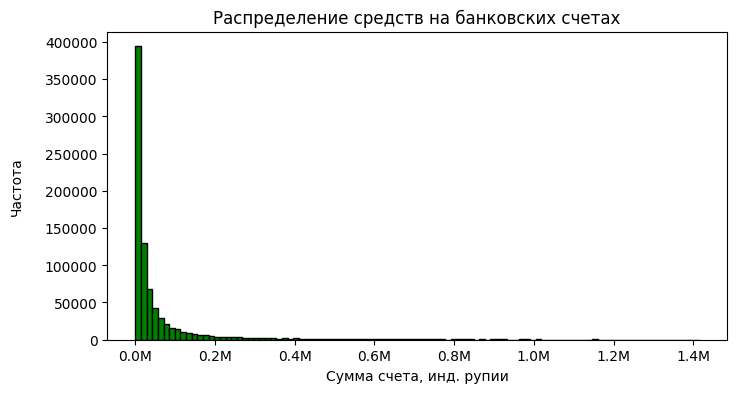

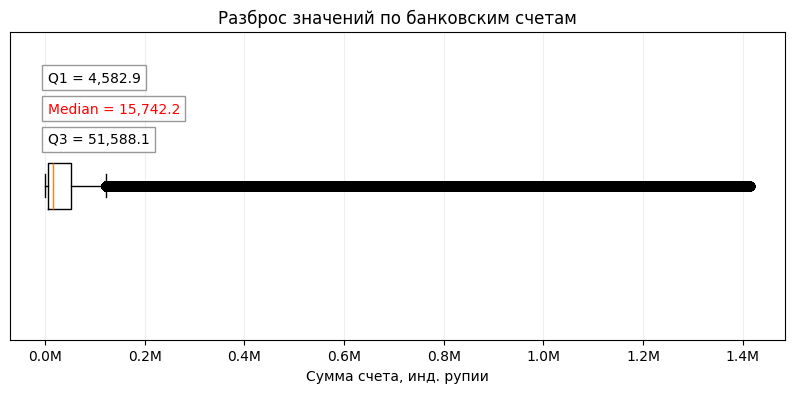

In [ ]:
# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(df_clean['cust_account_balance'], color='green', bins=100, edgecolor='black')
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
# Настройка отображения
plt.title('Распределение средств на банковских счетах')
plt.xlabel('Сумма счета, инд. рупии')
plt.ylabel('Частота', labelpad=15)
plt.grid(False)
plt.show()

# Построение ящика с усами
plt.figure(figsize=(10, 4))
plt.boxplot(df_clean['cust_account_balance'], vert=False)
# Вычисляем квартили вручную для точности
q1, q2, q3 = np.percentile(df_clean['cust_account_balance'], [25, 50, 75])
# Добавляем подписи квартилей
plt.text(q1, 1.35, f'Q1 = {q1:,.1f}', ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(q1, 1.25, f'Median = {q2:,.1f}', ha='left', va='center', fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(q1, 1.15, f'Q3 = {q3:,.1f}', ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
# Настройка отображения
plt.title('Разброс значений по банковским счетам')
plt.xlabel('Сумма счета, инд. рупии')
plt.yticks([])
plt.grid(axis='x', alpha=0.2)
plt.show()

In [ ]:
# Расчитаем процент выбросов
balances = df_clean['cust_account_balance']

# Рассчитываем квантили и IQR
Q1 = balances.quantile(0.25)
Q3 = balances.quantile(0.75)
IQR = Q3 - Q1

# Определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers_mask = (balances > upper_bound)

# Считаем количество и долю выбросов
number_of_outliers = outliers_mask.sum()
percentage_of_outliers = (number_of_outliers / len(balances)) * 100
print(f'За верхней границей лежит {round(percentage_of_outliers)}% значений')

За верхней границей лежит 13% значений


Распределение правое асимметричное, что говорит о большом количестве мелких счетов. Подавляющее большинство имеют на балансе менее 100,000 рупий. 50% счетов находятся в диапазоне от 4,583 до 51,588 рупий, с медианой - 15,742 рупий. 13% счетов держат на балансе от 100,000 до 1,400,000 рупий.

**Изучим распределение и размах величин в колонке с транзакциями**

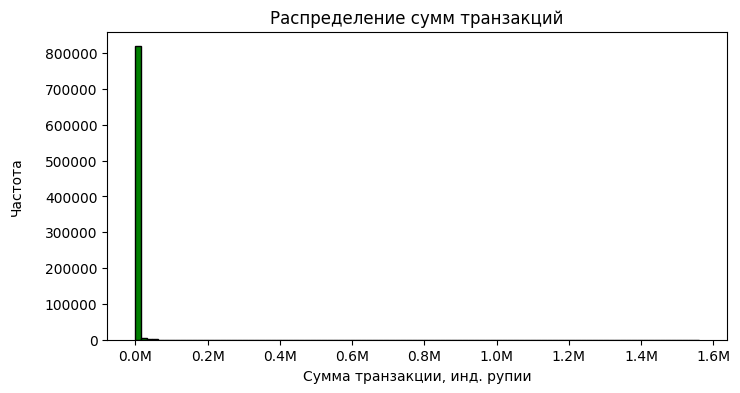

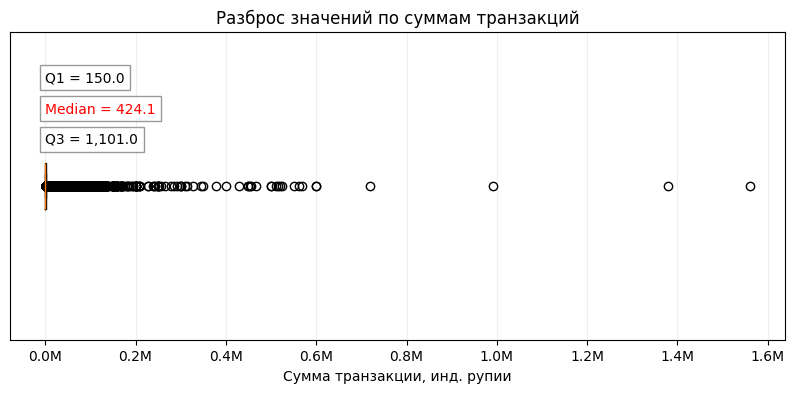

In [ ]:
# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(df_clean['transaction_amount_inr'], color='green', bins=100, edgecolor='black')
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
# Настройка отображения
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма транзакции, инд. рупии')
plt.ylabel('Частота', labelpad=15)
plt.grid(False)
plt.show()

# Построение ящика с усами
plt.figure(figsize=(10, 4))
plt.boxplot(df_clean['transaction_amount_inr'], vert=False)
# Вычисляем квартили вручную для точности
q1, q2, q3 = np.percentile(df_clean['transaction_amount_inr'], [25, 50, 75])
# Добавляем подписи квартилей
plt.text(q1, 1.35, f'Q1 = {q1:,.1f}', ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(q1, 1.25, f'Median = {q2:,.1f}', ha='left', va='center', fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(q1, 1.15, f'Q3 = {q3:,.1f}', ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
# Настройка отображения
plt.title('Разброс значений по суммам транзакций')
plt.xlabel('Сумма транзакции, инд. рупии')
plt.yticks([])
plt.grid(axis='x', alpha=0.2)
plt.show()

In [ ]:
# Расчитаем процент выбросов
transactions = df_clean['transaction_amount_inr']

# Рассчитываем квантили и IQR
Q1 = transactions.quantile(0.25)
Q3 = transactions.quantile(0.75)
IQR = Q3 - Q1

# Определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers_mask = (transactions > upper_bound)

# Считаем количество и долю выбросов
number_of_outliers = outliers_mask.sum()
percentage_of_outliers = (number_of_outliers / len(transactions)) * 100
print(f'За верхней границей лежит {round(percentage_of_outliers)}% значений')

За верхней границей лежит 11% значений


Распределение правое асимметричное, что говорит о большом количестве мелких транзакций. 50% транзакций находятся в диапазоне от 150 до 1,101 рупий, с медианой - 424 рупий. 11% транзакций содержат сумму более 2,500 рупий. Крупные транзакции в основном содержат сумму до 600,000 рупий, за редкими исключениями, которые доходят до 1,600,000 рупий.

**Изучим возраст клиентов**

In [ ]:
# Расчитаем возраст пользователей на момент совершения транзакции
df_clean['age'] = ((df_clean['transaction_date'] - df_clean['customer_dob']).dt.days / 365.25).round().astype(int)

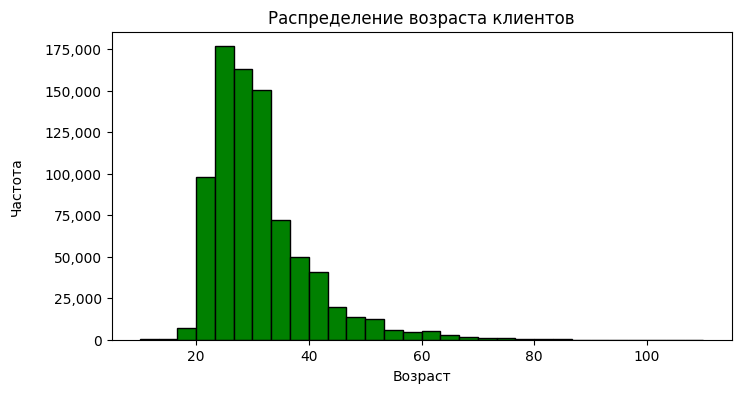

In [ ]:
# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(df_clean['age'], color='green', bins=30, edgecolor='black')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота', labelpad=15)
plt.grid(False)
plt.show()

Большинство клиентов находятся в возрасте 25-30 лет.

**Изучим распределение по полу клиентов**

In [ ]:
# Считаем долю мужчин и женщин
gender_counts = df_clean['cust_gender'].value_counts()
gender_counts_shares = gender_counts / gender_counts.sum() * 100
gender_counts_shares = gender_counts_shares.reset_index()

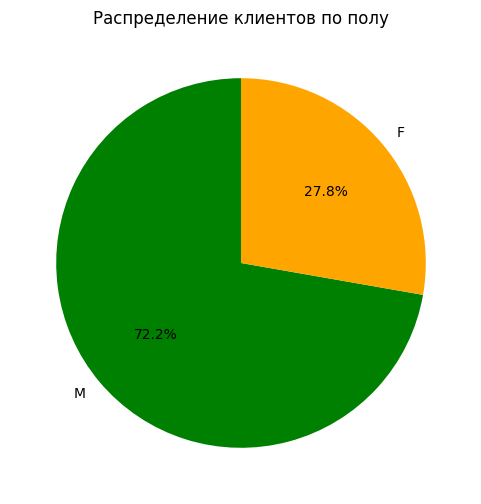

In [ ]:
# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_shares['count'], labels=gender_counts_shares['cust_gender'],
        colors=['green', 'orange'], autopct='%1.1f%%', startangle=90)
# Настройка отображения
plt.title('Распределение клиентов по полу')
plt.show()

72.2% клиентов банка - это мужчины, и лишь 27.8% клиентов являются женщинами.

**Изучим место жительства клиентов**

Так как в данных очень много городов, сделаем визуализацию для ТОП-10 городов.

In [ ]:
# Посчитаем количество клиентов в каждом городе
cnt_customer_per_cities = df_clean.groupby('cust_location')['customer_id'].count().sort_values(ascending=False)[:10]

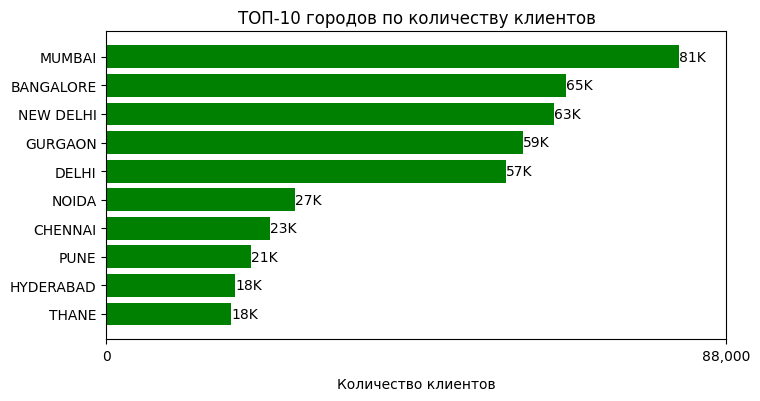

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(cnt_customer_per_cities.index, cnt_customer_per_cities.values, color='green')
plt.gca().invert_yaxis()
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval/1000:,.0f}K",
             ha='left', va='center')
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('ТОП-10 городов по количеству клиентов')
plt.xlabel('Количество клиентов', labelpad=10)
plt.xticks([0, 88000])
plt.grid(False)
plt.show()

Большая часть клиентов находится в городе Мумбай, около 81,000 уникальных пользователей.

**Посмотрим динамику по количеству транзакций**

In [ ]:
# Считаем количество транзакций на каждый день для полных месяцев
cnt_transactions = df_clean.groupby('transaction_date')['transaction_id'].count().sort_index()[:-2]

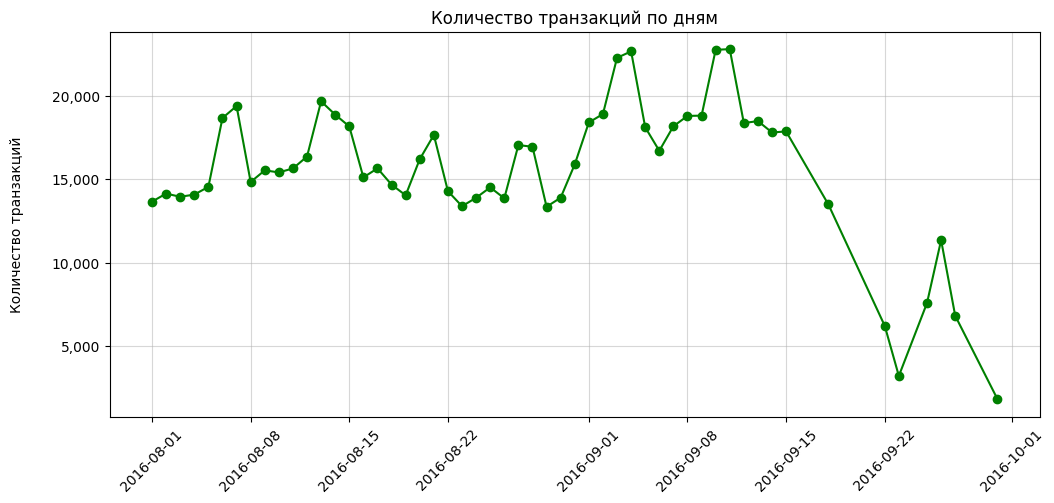

In [ ]:
# Построение линейного графика
plt.figure(figsize=(12, 5))
plt.plot(cnt_transactions.index, cnt_transactions.values, marker='o', color='green')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Количество транзакций по дням')
plt.ylabel('Количество транзакций', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

В августе количество транзакций в день совершалось от 14,000 до 20,000. В начале сентября этот показатель увеличился до 23,000, но в середине месяца произошел резкий спад и за несколько дней упал ниже 5,000 транзакций в день. Такое событие может говорить о резком оттоке клиентов или о сбое в системе обработки данных. Возможно, удаление информации повлияло на динамику графика.

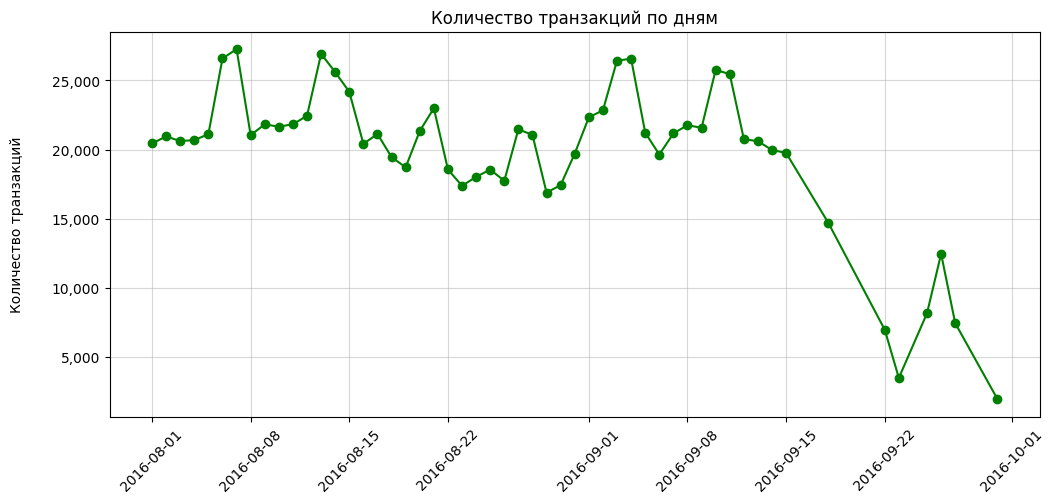

In [ ]:
# Посчитаем аналогичную динамику до очистки данных
cnt_transactions_before_cleaning = df.groupby('transaction_date')['transaction_id'].count().sort_index()[:-2]

# Построение линейного графика
plt.figure(figsize=(12, 5))
plt.plot(cnt_transactions_before_cleaning.index, cnt_transactions_before_cleaning.values, marker='o', color='green')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Количество транзакций по дням')
plt.ylabel('Количество транзакций', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

Очистка данных затронула в основном первый месяц и начало второго. В середине сентября действительно происходили события, которые нужно изучить внимательнее.

**Посмотрим динамику по количеству уникальных пользователей**

Так как в очищенных данных у каждого пользователя одна транзакция, посмотрим на распределение клиентов в изначальных данных.

In [ ]:
# Считаем количество уникальных пользователей на каждый день для полных месяцев
cnt_customers_before_cleaning = df.groupby('transaction_date')['customer_id'].nunique().sort_index()[:-2]

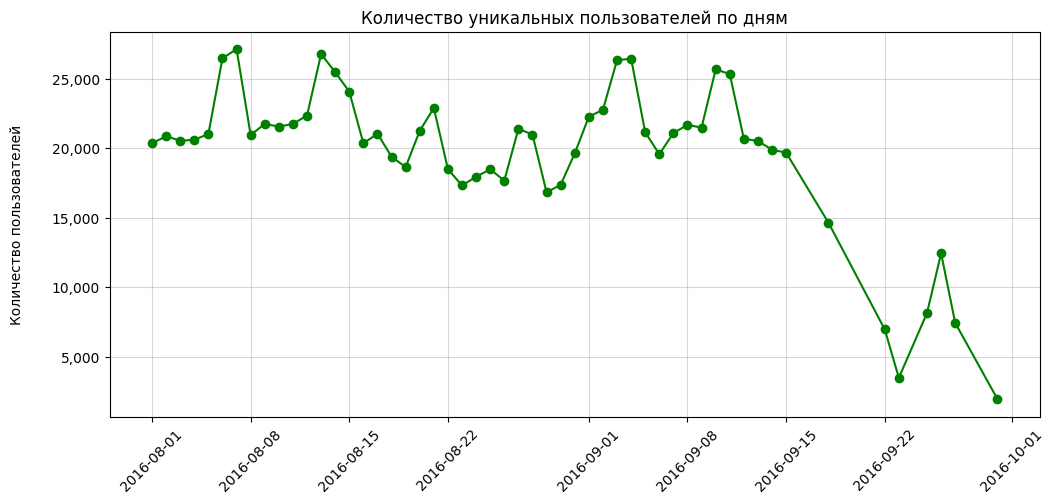

In [ ]:
# Построение линейного графика
plt.figure(figsize=(12, 5))
plt.plot(cnt_customers_before_cleaning.index, cnt_customers_before_cleaning.values, marker='o', color='green')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Количество уникальных пользователей по дням')
plt.ylabel('Количество пользователей', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

График не изменился, в изначальных данных у большинства пользователей, тоже было только по одной транзакции. Понять природу резкого спада, поможет дополнительная информация, которой нет в наших данных. Например, история технических ошибок за сентябрь или финансовые отчеты за этот же месяц.

Далее для анализа будем использовать очищенный датафрейм.

**Посмотрим динамику по сумме транзакций**

In [ ]:
# Считаем сумму транзакций на каждый день для полных месяцев
sum_transactions = df_clean.groupby('transaction_date')['transaction_amount_inr'].sum().sort_index()[:-2]

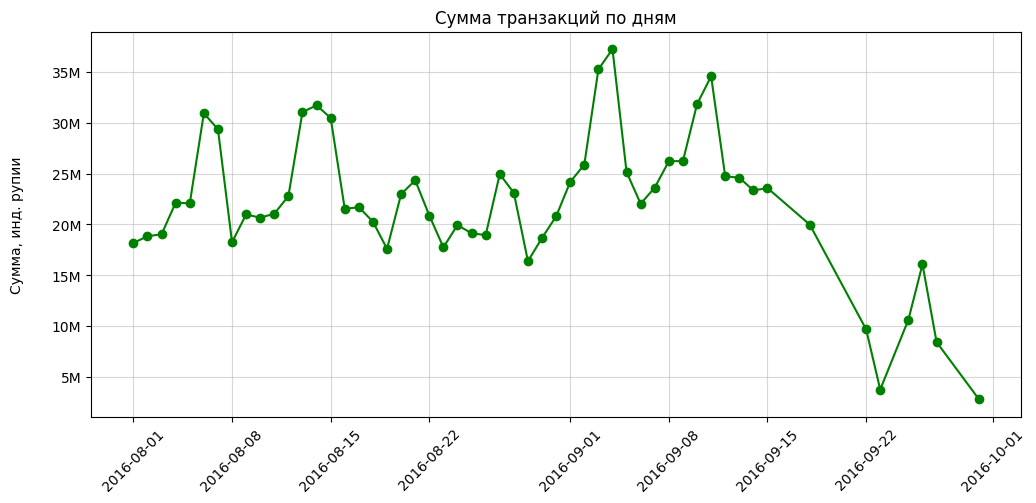

In [ ]:
# Построение линейного графика
plt.figure(figsize=(12, 5))
plt.plot(sum_transactions.index, sum_transactions.values, marker='o', color='green')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:,.0f}M'))
# Настройка отображения
plt.title('Сумма транзакций по дням')
plt.ylabel('Сумма, инд. рупии', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

В августе сумма транзакций колебалась от 16 млн. до 32 млн. рупий, с пиковыми значениями 6 и 14 августа. В сентябре видим рост до 36 млн. рупий - 4 числа и 35 млн. рупий - 11 числа, после чего происходит резкий спад ниже 5 млн. рупий в день на конец месяца. Спад аналогичный как на графике с количеством транзакций.

**Разделим клиентов по возрасту и определим самую платежеспособную группу**

In [ ]:
# Разбиваем клиентов на группы
df_clean['age_groups'] = pd.cut(df_clean['age'],
                                bins=[0, 20, 35, 50, 65, 120],
                                labels=['до 20', '21-35', '36-50', '51-65', '66 и старше'])

In [ ]:
# Считаем сумму транзакций для каждой группы
sum_transactions_age_groups = df_clean.groupby('age_groups', observed=True)['transaction_amount_inr'].sum().sort_values(ascending=False)

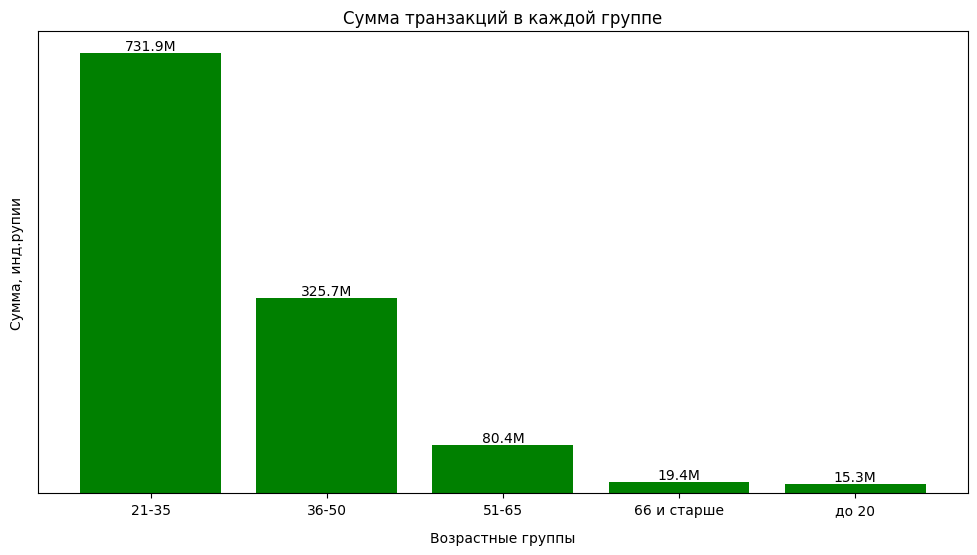

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
bars = plt.bar(sum_transactions_age_groups.index, sum_transactions_age_groups.values, color='green')
# Добавление подписей значений на каждом столбце
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{int(yval)/1e6:.1f}M", ha='center', va='bottom')
# Настройка отображения
plt.title('Сумма транзакций в каждой группе')
plt.ylabel('Сумма, инд.рупии', labelpad=10)
plt.xlabel('Возрастные группы', labelpad=10)
plt.yticks([])
plt.grid(False)
plt.show()

Группа в возросте 21-35 намного чаще делают переводы, чем другие группы. Их суммарные переводы за 2 месяца составили 731.9 млн. рупий.

**Посмотрим сумму транзакций в каждом городе**

In [ ]:
# Посчитаем сумму транзакций в каждом городе
sum_transactions_per_cities = df_clean.groupby('cust_location')['transaction_amount_inr'].sum().sort_values(ascending=False)[:10]

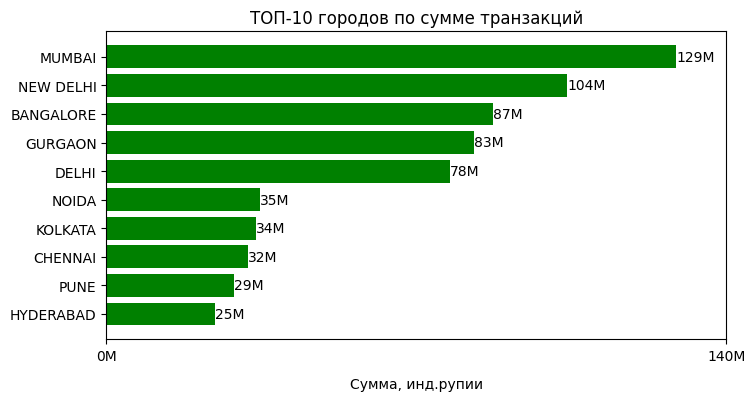

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(sum_transactions_per_cities.index, sum_transactions_per_cities.values, color='green')
plt.gca().invert_yaxis()
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1e6:,.0f}M'))
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval/1e6:,.0f}M",
             ha='left', va='center')
# Настройка отображения
plt.title('ТОП-10 городов по сумме транзакций')
plt.xlabel('Сумма, инд.рупии', labelpad=10)
plt.xticks([0, 140000000])
plt.grid(False)
plt.show()

Мумбай лидирует среди городов по суммарно сделанным транзакциям, за два месяца было сделано транзакций на сумму 129 млн. рупий. На втором месте - город Нью-Дели, там транзакций сделано на сумму 104 млн. рупий, хотя по количеству клиентов этот город находится на третьем месте. Это значит, что клиенты из Нью-Дели делают более крупные транзакции.

**Посмотрим на среднюю транзакцию по городам**

In [ ]:
# Посчитаем среднюю транзакцию в каждом городе
mean_transactions_per_cities = df_clean.groupby('cust_location')['transaction_amount_inr'].mean().sort_values(ascending=False)[:10]

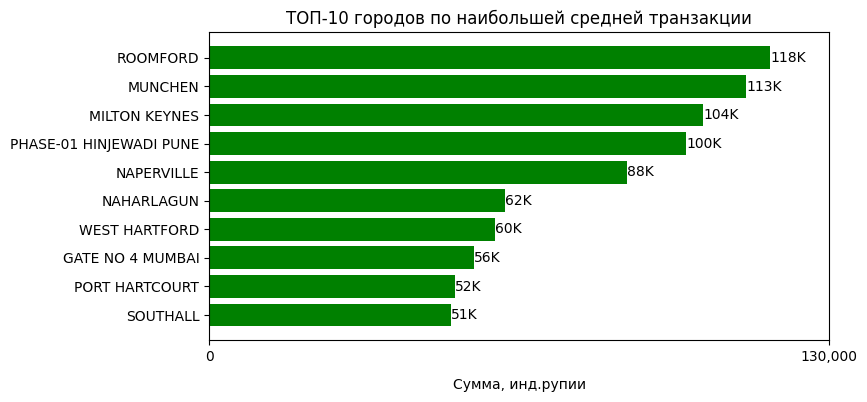

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(mean_transactions_per_cities.index, mean_transactions_per_cities.values, color='green')
plt.gca().invert_yaxis()
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval/1000:.0f}K",
             ha='left', va='center')
# Настройка отображения
plt.title('ТОП-10 городов по наибольшей средней транзакции')
plt.xlabel('Сумма, инд.рупии', labelpad=10)
plt.xticks([0, 130000])
plt.grid(False)
plt.show()

Если смотреть среднюю транзакцию в городе, то лидеры здесь полностью меняются. Наибольшая средняя транзакция в городах Румфорд и Мюнхен, 118,000 и 113,000 рупий соответственно.

**Посмотрим в какое время суток чаще делают транзакции**

In [ ]:
# Извлекаем часы
df_clean['hour'] = df_clean['transaction_time'].apply(lambda x: x.hour)

# Считаем частотность каждого часа
cnt_hours = df_clean['hour'].value_counts().sort_index()

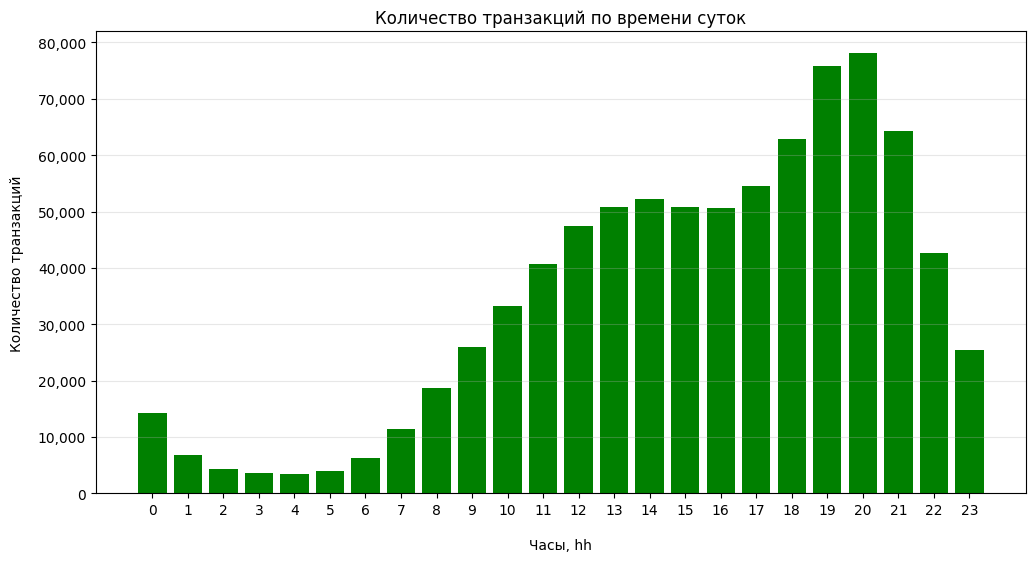

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
bars = plt.bar(cnt_hours.index, cnt_hours.values, color='green')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Количество транзакций по времени суток')
plt.ylabel('Количество транзакций', labelpad=10)
plt.xlabel('Часы, hh', labelpad=15)
plt.xticks(cnt_hours.index)
plt.grid(axis='y', alpha=0.3)
plt.show()

Рост количества транзакций начинается после 6 утра и достигает своих пиковых значений с 20:00 до 21:00 часов. После количество транзакций резко уменьшается.

# Выводы по исследовательскому анализу

* В наших данных есть 828,302 уникальных транзакций, где каждая транзакция принадлежит уникальному клиенту.
* Счета в банке в основном мелкие, 50% из них находятся в диапазоне от 4,583 до 51,588 рупий. Есть и крупные счета от 100,000 до 1,400,000 рупий, таких счетов 13% от всего объема данных.
* Суммы транзакций в основном находятся в диапазоне от 150 до 1,101 рупий. 11% транзакций содержат сумму более 2,500 рупий.
* Большинство клиентов находятся в возрасте 25-30 лет. Самая платежеспособная группа по возрасту 21-35 лет, их суммарные переводы за 2 месяца составили 731.9 млн. рупий.
* 72.2% клиентов банка - это мужчины, и лишь 27.8% клиентов являются женщинами.
* Большая часть клиентов находится в городе Мумбай, там около 81,000 уникальных пользователей. Также Мумбай лидирует по суммарно сделанным транзакциям, за два месяца было сделано транзакций на сумму 129 млн. рупий. Если смотреть среднюю транзакцию в городе, то лидеры здесь полностью меняются. Наибольшая средняя транзакция в городах Румфорд и Мюнхен, 118,000 и 113,000 рупий соответственно.
* В августе количество транзакций в день совершалось от 14,000 до 20,000. В начале сентября этот показатель увеличился до 23,000, но в середине месяца произошел резкий спад и за несколько дней упал ниже 5,000 транзакций в день. Такое событие может говорить о резком оттоке клиентов или о сбое в системе обработки данных. Понять природу резкого спада, поможет дополнительная информация, например, история технических ошибок за сентябрь или финансовые отчеты за этот же месяц.
* В августе сумма транзакций колебалась от 16 млн. до 32 млн. рупий, с пиковыми значениями 6 и 14 августа. В сентябре видим рост до 36 млн. рупий - 4 числа и 35 млн. рупий - 11 числа, после чего происходит резкий спад ниже 5 млн. рупий в день на конец месяца. Спад аналогичный как с количеством транзакций.
* Дневная активность транзакций начинается после 6 утра и достигает своих пиковых значений с 20:00 до 21:00 часов. После количество транзакций резко уменьшается.